<a href="https://colab.research.google.com/github/luciapapalini/transformers-hands-on/blob/main/transformers_intuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 TRANSFORMERS ENCODER INTRO Hands-on (30 minutes)

Welcome! In this short interactive session, we’ll explore the basics of **embedding** and **attention**, that are the core elements of every Transformer model. Since Transformers were born as translation models, I think that starting from understanding their functioning with ***text*** and ***languages*** makes them more intuitive.

Since we have 30 mins we are going to focus on the Encoder part of the model.

🎯 **Goal**: Get an intuitive idea of what a Transformer Encoder does.

If it's the first time running this notebook uncomment the following line and run the cell:

In [1]:
# If it's the first time running this colab, remove the comment on the following line and run the cell (it may take a couple of minutes)
#!pip install torch==2.0.1 torchtext==0.15.2 numpy==1.26.4 scikit-learn==1.3.0 matplotlib==3.7.1 --quiet --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8

⚠️ Then, click on "Runtime" in the menu and click "Restart the session", then continue with the rest of the notebook!

(sorry, first time building a colab, I got lost in dependencies!)

# 1. EMBEDDING

Embedding is an essential part of Transformers model. It is the first stage that data encounter in the algorithm. The goal of this part is to "translate" the input data in the so-called embedding space, which is a high-dimensional space where the Transformer core part works.

Typically, the input is chunked in "tokens" that are subparts of the input serie.

At first, we are using the module **[Embedding](https://)** from the torch library that creates custom random embeddings. It creates a basic look-up table that holds embeddings for a predefined set of items with fixed dimensions.

This module is commonly used to manage word embeddings, allowing you to retrieve them based on index values. It takes a list of indices as input and returns the corresponding embeddings.

    torch.nn.Embedding(num_embeddings, embedding_dim, padding_idx=None, max_norm=None, norm_type=2.0, scale_grad_by_freq=False, sparse=False, _weight=None, _freeze=False, device=None, dtype=None)

First two parameters:

    num_embeddings (int) – size of the dictionary of embeddings
    embedding_dim (int) – the size of each embedding vector

Let's analyze the sentence:

*Sarah carried a light bad walking under the light*

In [16]:
import torch
import torch.nn as nn

⚠️ Typically in language models tokens are parts of words, like:

    Transformers ---> Tra-ns-form-er-s

But for the purpose of this tutorial and for some simpler approches let's assume **tokens = words**, and let's split our sentences in separate words.


In [2]:
# let's pretend our vocabulary is just made of the few words we need + others for fun
vocab = ['sarah', 'carried', 'a', 'light', 'bag', 'walking', 'under', 'the', 'chocolate', 'travel', 'cat']
word2idx = {word: idx for idx, word in enumerate(vocab)}  # a dictionary words --> index (in the vocabulary)
idx2word = {idx: word for word, idx in word2idx.items()}  # a dictionary index --> word

sentence = "sarah carried a light bag walking under the light"  # 9 words = sequence length

# let's create tokens out of our sentence
tokens = sentence.lower().split()
token_ids = [word2idx[word] for word in tokens]
input_tensor = torch.tensor(token_ids)  # shape: (seq_len,)

We need to fix an important parameter: the **embedding dimension** (or dimension od the model, **d_model**).
This parameter tells us how many dimension the embedding space is going to have, more dimensions --> more expressive model, more information stored for each token

In [3]:
d_model = 8

# let's initialize our Embedding layer
embedding = nn.Embedding(num_embeddings=len(vocab), embedding_dim=d_model)

# and then let's create embed our input data
embedded = embedding(input_tensor)  # shape: (seq_len, embed_dim)
print(embedded.shape)

torch.Size([9, 8])


In [4]:
# let's see how the embeddings look like

for word in tokens:
    idx = word2idx[word]
    emb_vector = embedding(torch.tensor(idx))
    print(f"{word} --> {emb_vector.detach()}")

sarah --> tensor([ 1.0862,  0.8400,  0.4712, -2.1096, -0.6732, -0.2952,  1.5776,  0.1542])
carried --> tensor([ 0.7982, -1.2172, -0.8235,  1.4750, -0.9723, -0.3775, -1.4768,  0.4202])
a --> tensor([-0.1051,  0.3661, -2.3274, -0.9275, -1.5747,  0.4985,  1.1869, -0.9524])
light --> tensor([-2.6520, -0.6489,  0.6479, -1.3240, -1.2587,  0.1988, -0.0386, -1.4745])
bag --> tensor([-0.0739, -0.9190, -1.2324,  1.0587,  0.5750,  0.1390,  0.9746, -0.6582])
walking --> tensor([ 1.2497, -1.7953, -0.7289,  0.3799,  0.7374, -1.0663,  0.5875, -0.2950])
under --> tensor([-0.9236, -0.8348,  0.4957, -1.1336, -0.5165,  0.4320, -0.5254, -1.2058])
the --> tensor([ 0.3968, -1.2282, -0.6530, -0.6144, -0.1663, -0.0605,  0.4406,  1.7600])
light --> tensor([-2.6520, -0.6489,  0.6479, -1.3240, -1.2587,  0.1988, -0.0386, -1.4745])


# Let's try using a pre-trained word embedding model: GloVe

In principle, `nn.Embedding` can be used for many embedding tasks — not just for sentences or words. That’s why we explored it earlier with a custom vocabulary.

But when it comes to natural language, there are already large, pre-trained vocabularies we can take advantage of. One of the most popular is **[GloVe](https://nlp.stanford.edu/projects/glove/)** (Global Vectors for Word Representation), which is included in the `torchtext` library and works seamlessly with our convention of treating *tokens = words*.

🔍 GloVe provides **pre-trained word embeddings**, learned from massive corpora like Wikipedia and Common Crawl. Each word in its vocabulary is mapped to a dense vector (e.g., 50-dimensional), capturing semantic relationships such as:

> `"king" - "man" + "woman" ≈ "queen"`

However, it's important to note that GloVe is a **static embedding model**:  
each word corresponds to **a single vector**, regardless of context. So a word like *"bank"* (which could mean a financial institution or the side of a river) will always have the same embedding, no matter the sentence.

🔄 So now, we’re going to **repeat our embedding example** using GloVe instead of our toy vocabulary, to see how these real-world vectors behave!

In [17]:
import torch
from torchtext.vocab import GloVe

# Load GloVe from torchtext
glove = GloVe(name='6B', dim=50)  # using 50-dimensional GloVe vectors


In [6]:
# Example sentence
sentence = "Sarah carried a light bag walking under the light"
tokens = sentence.lower().split()

# Extract and print embedding for each word
print("Word → Embedding vector:")
for word in tokens:
    if word in glove.stoi:
        emb = glove[word]
        print(f"{word:>10} → {emb[:5]}")  # first 5 elements to make comparison easier
    else:
        print(f"{word:>10} → [UNK]")

Word → Embedding vector:
     sarah → tensor([-0.4671,  1.6665,  0.1289, -0.1402,  0.4243])
   carried → tensor([ 0.6284, -0.0887,  0.3397, -0.5304,  0.0704])
         a → tensor([ 0.2171,  0.4651, -0.4676,  0.1008,  1.0135])
     light → tensor([ 0.0063,  0.4725, -0.0733, -0.0060,  0.3675])
       bag → tensor([-0.0282, -0.2216,  0.4478, -0.1850,  0.9992])
   walking → tensor([ 0.2787,  0.7067, -0.3070, -0.5401,  0.6306])
     under → tensor([ 0.1372, -0.2950, -0.0592, -0.5924,  0.0230])
       the → tensor([ 0.4180,  0.2497, -0.4124,  0.1217,  0.3453])
     light → tensor([ 0.0063,  0.4725, -0.0733, -0.0060,  0.3675])


‼️‼️‼️

Notice that the word *light* appears twice in this sentence, once in position 3 and once in position 8.

In both the cases it has the same embedding at this stage, but we know that in order to understand the meaning of this sentence that the two words have two main differences:


*   Position in the sentence
*   Meaning of the word (weight of the bag, source of illumination)


How do we express this differences in their embedding? Stay tuned for later!

## Exploring Semantic Relationships with PCA

Word embeddings like GloVe capture **semantic meaning** in a high-dimensional space. Words with similar meanings or relationships tend to lie close together or along similar directions in this space.

To visualize this, we use **Principal Component Analysis (PCA)** to reduce the 50-dimensional vectors down to 2D. This allows us to see some of these relationships — for example:

- animal → baby animal (e.g. *dog → puppy*)
- country → capital (e.g. *France → Paris*)

Even in two dimensions, these pairs often align along similar directions, revealing **consistent semantic patterns** learned by the embedding model. Let's try to see this!

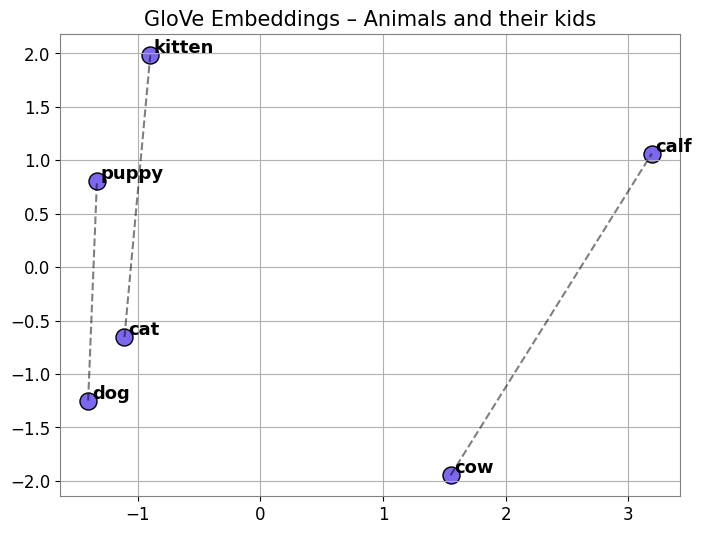

In [18]:
import torch
from torchtext.vocab import GloVe
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# General plot settings
plt.rcParams.update({
    "font.size": 12,
    "figure.facecolor": "white",
    "axes.edgecolor": "gray",
    "axes.grid": True
})

glove = GloVe(name='6B', dim=50)

# --- Set 1: Animals and their kids ---
animal_words = ["dog", "puppy", "cat", "kitten", "cow", "calf"]
animal_pairs = [("dog", "puppy"), ("cat", "kitten"), ("cow", "calf")]

animal_vectors = torch.stack([glove[w] for w in animal_words]).numpy()
pca_animal = PCA(n_components=2).fit_transform(animal_vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(animal_words):
    x, y = pca_animal[i]
    plt.scatter(x, y, color="mediumslateblue", s=150, edgecolors="k")
    plt.text(x + 0.03, y + 0.02, word, fontsize=13, weight='bold')
for a, b in animal_pairs:
    i, j = animal_words.index(a), animal_words.index(b)
    plt.plot([pca_animal[i][0], pca_animal[j][0]], [pca_animal[i][1], pca_animal[j][1]], 'k--', alpha=0.5)
plt.title("GloVe Embeddings – Animals and their kids", fontsize=15)
plt.show()

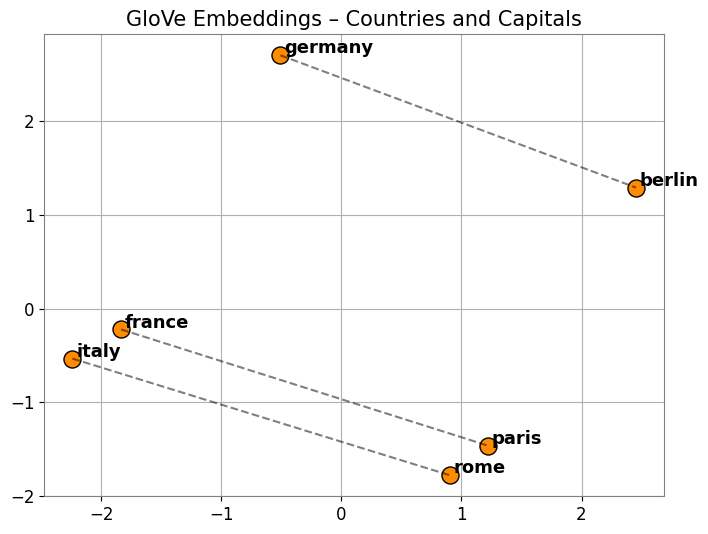

In [8]:
# --- Set 2: Countries and Capitals ---
geo_words = ["france", "paris", "italy", "rome", "germany", "berlin"]
geo_pairs = [("france", "paris"), ("italy", "rome"), ("germany", "berlin")]

geo_vectors = torch.stack([glove[w] for w in geo_words]).numpy()
pca_geo = PCA(n_components=2).fit_transform(geo_vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(geo_words):
    x, y = pca_geo[i]
    plt.scatter(x, y, color="darkorange", s=150, edgecolors="k")
    plt.text(x + 0.03, y + 0.02, word, fontsize=13, weight='bold')
for a, b in geo_pairs:
    i, j = geo_words.index(a), geo_words.index(b)
    plt.plot([pca_geo[i][0], pca_geo[j][0]], [pca_geo[i][1], pca_geo[j][1]], 'k--', alpha=0.5)
plt.title("GloVe Embeddings – Countries and Capitals", fontsize=15)
plt.show()

You can have fun searching for other semantic meanings captured by GloVe! Just try changing `words` and `pairs`!

## 📍 POSITIONAL ENCODING: capturing word order

‼️‼️‼️  
Remember how we noted that the word *light* appears **twice** in the sentence:

> "Sarah carried a **light** bag walking under the **light**"

At this stage, both instances of *light* have **identical embeddings**, because GloVe assigns the **same vector** to a word, regardless of where it appears in a sentence.

But for the model to understand the structure of the sentence, it must know that:

- These two words appear in **different positions** in the sequence.

In other words: **order matters**, and Transformers — by design — do **not** know the order of the input tokens.  
They process all words **in parallel**, with no sense of "who comes first."

That’s where **Positional Encoding** comes in.

To give the model a notion of order, we add a **position-specific vector** to each word embedding. This way, the same word in different places will be represented **differently**.

### **How does it work?**
Each position in the sentence is mapped to a unique vector using sine and cosine functions of different frequencies:

$$
\text{PE}_{(pos, 2i)} = \sin\left(\frac{pos}{10000^{\frac{2i}{d}}}\right), \quad
\text{PE}_{(pos, 2i+1)} = \cos\left(\frac{pos}{10000^{\frac{2i}{d}}}\right)
$$

Where:
- `pos` is the word’s position in the sentence
- `i` is the index of the dimension
- `d` is the embedding size

These patterns allow the model to learn both **absolute** and **relative** positions.

Now let’s apply this encoding to our GloVe vectors, and observe how the representation of each word is modified by its position in the sentence.

In [26]:
import numpy as np

# our sentence
sentence = "Sarah carried a light bag walking under the light"
tokens = sentence.lower().split()

# GloVe embedding
embeddings = torch.stack([glove[token] for token in tokens]).numpy()

# Positional Encoding
def positional_encoding(position, d_model):
    angle_rates = 1 / np.power(10000, (2 * (np.arange(d_model) // 2)) / np.float32(d_model))
    angle_rads = np.arange(position)[:, np.newaxis] * angle_rates[np.newaxis, :]
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return angle_rads

pos_enc = positional_encoding(len(tokens), embeddings.shape[1])
embedded_with_pos = embeddings + pos_enc

print(f"{'Word':<10} → {'Embedding[0:5]':<30} \t  → {'+ PosEnc[0:5]'}")
print("-" * 70)
for i, word in enumerate(tokens):
    emb = embeddings[i][:5]
    emb_pos = embedded_with_pos[i][:5]
    print(f"{word:<10} → {np.round(emb, 3)} → {np.round(emb_pos, 3)}")

Word       → Embedding[0:5]                 	  → + PosEnc[0:5]
----------------------------------------------------------------------
sarah      → [-0.467  1.666  0.129 -0.14   0.424] → [-0.467  2.666  0.129  0.86   0.424]
carried    → [ 0.628 -0.089  0.34  -0.53   0.07 ] → [1.47  0.452 0.978 0.24  0.531]
a          → [ 0.217  0.465 -0.468  0.101  1.014] → [1.126 0.049 0.515 0.287 1.831]
light      → [ 0.006  0.472 -0.073 -0.006  0.368] → [ 0.147 -0.518  0.802 -0.49   1.358]
bag        → [-0.028 -0.222  0.448 -0.185  0.999] → [-0.785 -0.875  0.813 -1.116  1.941]
walking    → [ 0.279  0.707 -0.307 -0.54   0.631] → [-0.68   0.99  -0.619 -1.49   1.311]
under      → [ 0.137 -0.295 -0.059 -0.592  0.023] → [-0.142  0.665 -0.906 -1.125  0.29 ]
the        → [ 0.418  0.25  -0.412  0.122  0.345] → [ 1.075  1.004 -1.404  0.252  0.138]
light      → [ 0.006  0.472 -0.073 -0.006  0.368] → [ 0.996  0.327 -0.754  0.727 -0.267]


Now, their embeddings are telling us:  
**"This is the same word, but it appears in two different positions."**

But we still have a big question:

💭 **How do we encode the fact that these two words might mean completely different things?**

One refers to *something light in weight*, the other to *a source of light*.

This is where **attention** comes in — a powerful mechanism that allows the model to **contextualize** each word based on the others around it.  
Let’s see how it works!

## 👁️ SELF-ATTENTION: understanding meaning from context

So far, each word is represented by a vector that combines:
- its **semantic identity** from GloVe  
- its **position** in the sentence from positional encoding  

But there's something crucial missing:  
How does the model know what a word **means** depending on **context**?

For example, how does it distinguish between:  
> *“a light bag”* vs *“under the light”*?

### What is Self-Attention?

In a Transformer, each word compares itself to every other word in the sentence to decide:  
> "How much should I pay attention to this word when building my own representation?"

This comparison happens through three matrices:
- **Queries** $Q$  
- **Keys** $K$  
- **Values** $V$

In our simplified example, we set:  
$$
Q = K = V = X
$$  
where $X$ is the matrix of input embeddings (already enriched with positional encoding).

### How does it work?

We compute a **score** for how much each word should attend to the others :  
$$
\text{score}_{ij} = \frac{Q_i \cdot K_j^T}{\sqrt{d_k}}
$$

(This score is computed as a scaled dot product, which geometrically represents how similar the two vectors are. In other words, how aligned or “relevant” the Key is to the Query.)

Then we apply **softmax** to turn scores into probabilities (weights):  
$$
\text{attention}_{ij} = \text{softmax}_j\left(\frac{Q_i \cdot K_j^T}{\sqrt{d_k}}\right)
$$

Finally, we use these weights to compute a **new representation** for each word as a weighted sum of the Value vectors:  
$$
\text{output}_i = \sum_j \text{attention}_{ij} \cdot V_j
$$

This lets each word adapt its representation based on **relevant context**.

Let’s compute and **visualize the attention matrix** for our sentence!

---

⚠️ **Warning – Simplified Version Ahead!**

The self-attention mechanism we’re implementing here is a **very simplified version** of what happens in a real Transformer.

In practice:
- The **Query**, **Key**, and **Value** matrices are not just equal to the input `X`
- They are **learned projections**, computed as:  
$$
Q = XW^Q, \quad K = XW^K, \quad V = XW^V
$$  
where $W^Q$, $W^K$, and $W^V$ are weight matrices **learned during training**.

Our goal here is just to **build intuition**.  
This example skips the learned weights so we can focus on understanding **how attention works conceptually**.

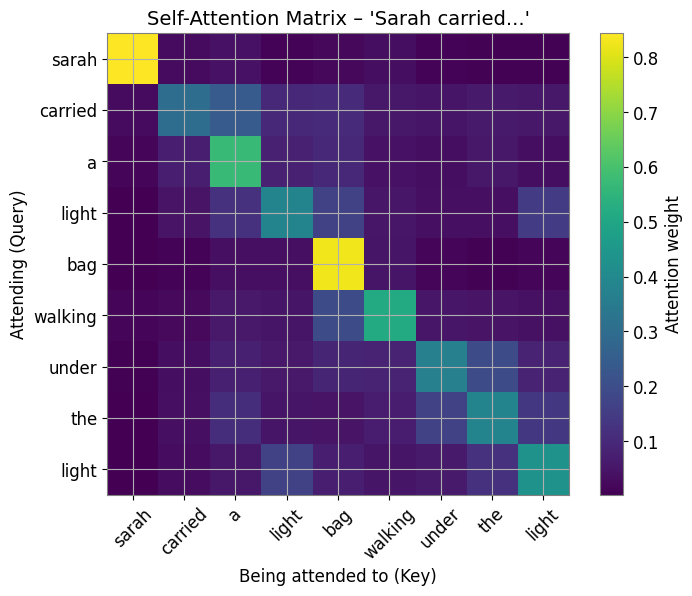

In [33]:
import torch.nn.functional as F

def compute_self_attention(embeddings: np.ndarray) -> tuple[torch.Tensor, torch.Tensor]:
    X = torch.tensor(embeddings, dtype=torch.float32)
    Q = K = V = X  # simplified: using same input for Q, K, V

    d_k = X.shape[1]
    scores = Q @ K.T / np.sqrt(d_k)
    attention_weights = F.softmax(scores, dim=-1)

    attention_output = attention_weights @ V
    return attention_weights, attention_output

attention_weights, _ = compute_self_attention(embedded_with_pos)

# Visualize attention matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(attention_weights.detach().numpy(), cmap='viridis')
plt.xticks(ticks=range(len(tokens)), labels=tokens, rotation=45)
plt.yticks(ticks=range(len(tokens)), labels=tokens)
plt.title("Self-Attention Matrix – 'Sarah carried...'", fontsize=14)
plt.colorbar(label="Attention weight")
plt.xlabel("Being attended to (Key)")
plt.ylabel("Attending (Query)")
plt.show()

What are the words attending to?

This matrix shows how much each word focuses on others when building its contextual meaning.
You can spot patterns where:

*	 Content words attend to related words (e.g. objects, actions, causes)
*	 Function words like “the” often have low or diffuse attention
*	 Some words focus mainly on themselves, especially at the end of the sentence.

Try changing the sentence to see how attention patterns adapt!

## Let's try with another sentence with some more complex implication!

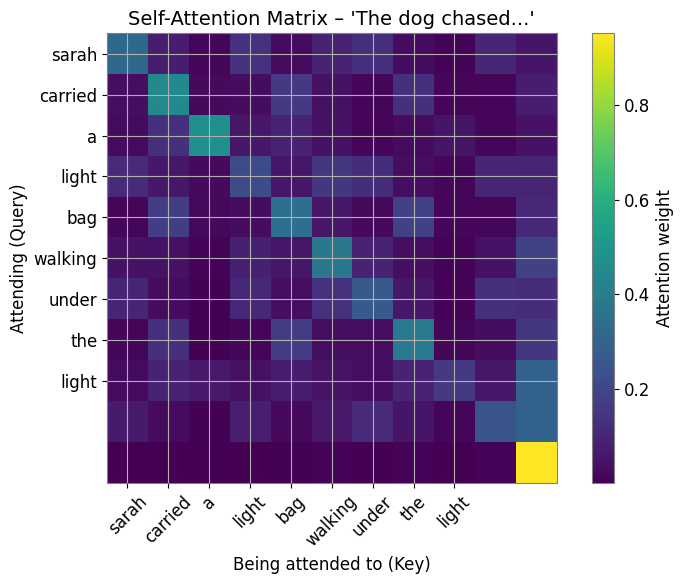

In [34]:
# sentence
sentence_2 = "The dog chased the cat because the cat stole the food"
tokens_2 = sentence_2.lower().split()

# GloVe embedding
embeddings_2 = torch.stack([glove[token] for token in tokens_2]).numpy()

# positional encoding

pos_enc_2 = positional_encoding(len(tokens_2), embeddings_2.shape[1])
embedded_with_pos_2 = embeddings_2 + pos_enc_2

# self-attention
attention_weights_2, _ = compute_self_attention(embedded_with_pos_2)

# Visualize attention matrix
plt.figure(figsize=(8, 6))
plt.imshow(attention_weights_2.detach().numpy(), cmap='viridis')
plt.xticks(ticks=range(len(tokens)), labels=tokens, rotation=45)
plt.yticks(ticks=range(len(tokens)), labels=tokens)
plt.title("Self-Attention Matrix – 'The dog chased...'", fontsize=14)
plt.colorbar(label="Attention weight")
plt.xlabel("Being attended to (Key)")
plt.ylabel("Attending (Query)")
plt.tight_layout()
plt.show()

## Updating embeddings via Attention Output

Now that we have computed the `attention_output`, we can see how each word vector is **updated** based on the context of the entire sentence.

In Transformers, this happens through the **Value** vectors: the original embeddings (`V`) are combined using the attention weights, such that:

In [35]:
# Attention output computation (already done)
_ , attention_output_2 = compute_self_attention(embedded_with_pos_2)

# Clean comparison printout (first 5 dimensions)
print(f"{'Word':<10} → {'Original[0:5]':<45} → {'AttentionOut[0:5]'}")
print("-" * 100)
for i, word in enumerate(tokens_2):
    original = embedded_with_pos_2[i][:5]  # già numpy
    updated = attention_output_2[i][:5].detach().numpy()  # solo questo è torch
    print(f"{word:<10} → {np.round(original, 4)} → {np.round(updated, 4)}")

Word       → Original[0:5]                                 → AttentionOut[0:5]
----------------------------------------------------------------------------------------------------
the        → [ 0.418   1.2497 -0.4124  1.1217  0.3453] → [ 0.3877  0.2817 -0.3243  0.3118  0.5088]
dog        → [0.9516 0.1525 0.0618 0.4929 1.1658] → [ 0.5865 -0.2028 -0.1826  0.1216  0.8022]
chased     → [ 0.9644 -1.8077  1.9698 -0.3374  1.3874] → [ 0.6725 -1.0483  0.911  -0.1421  1.068 ]
the        → [ 0.5591 -0.7403  0.4629 -0.3618  1.3362] → [ 0.3124 -0.1616 -0.1866 -0.0171  0.5987]
cat        → [-0.304  -1.1547 -0.1715 -0.9465  1.1634] → [ 0.3123 -0.4962 -0.3268 -0.2128  0.6957]
because    → [-0.4299 -0.0178 -0.2561 -1.129   0.8372] → [ 0.0281 -0.2425 -0.2439 -0.3191  0.5194]
the        → [ 0.1386  1.2099 -1.2589 -0.4107  0.6118] → [ 0.2764  0.0915 -0.4981  0.0112  0.4059]
cat        → [ 1.1098  0.2528 -1.5286  0.1144  0.0146] → [ 0.5511 -0.2586 -0.6644  0.0362  0.3426]
stole      → [ 0.7864 -0.6823  0.

## How much did the embeddings change?

After applying self-attention, each word’s embedding is **updated** to reflect its meaning in context.

But by how much did each vector actually change?

To quantify this, we compute the **Euclidean distance** between each word’s original embedding (with positional encoding) and its updated version after attention:

$$
\Delta = \left\| \text{embedding}_{\text{after}} - \text{embedding}_{\text{before}} \right\|
$$

Sorting these distances tells us **which words were most influenced** by the context — often those whose meaning is more ambiguous or dependent on surrounding words.

In [15]:
from numpy.linalg import norm

# Compute distances
word_deltas = []
for i, word in enumerate(tokens):
    original = embedded_with_pos[i]
    updated = attention_output_2[i].detach().numpy()
    distance = norm(updated - original)
    word_deltas.append((word, distance))

# Sort descending
word_deltas.sort(key=lambda x: -x[1])

# Print
print(f"{'Word':<10} → Δ distance (||new - old||)")
print("-" * 45)
for word, dist in word_deltas:
    print(f"{word:<10} → {dist:.4f}")

Word       → Δ distance (||new - old||)
---------------------------------------------
stole      → 3.3657
chased     → 2.5977
the        → 2.3484
the        → 2.3374
because    → 2.1701
the        → 2.1428
the        → 2.0829
cat        → 1.9710
cat        → 1.9131
dog        → 1.8873
food       → 0.2601
